In [5]:
import pandas as pd
import numpy as np
import cv2
import pytesseract
custom_config = r' --oem 3 --psm 6'
from matplotlib import pyplot as plt

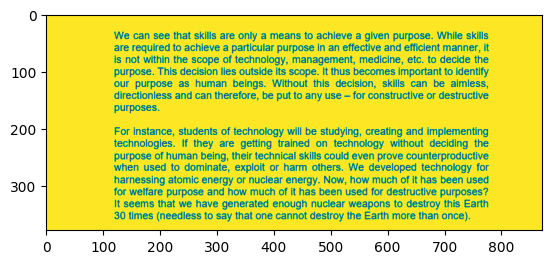

In [6]:

img = cv2.imread("i1.png",0)
plt.imshow(img)
plt.show()

In [7]:
def sharpen_image(im):
  kernel = np.ones((3,3),np.float32)/90
  im = cv2.filter2D(im,-1,kernel)
  return im

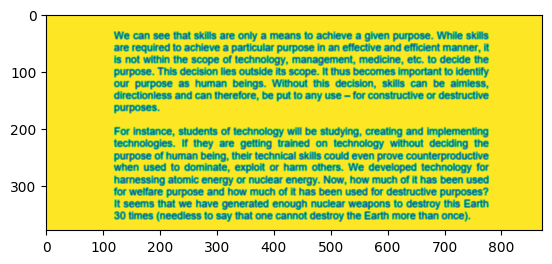

In [8]:
img = sharpen_image(img)
# display sharpened image
plt.imshow(img)
plt.show()

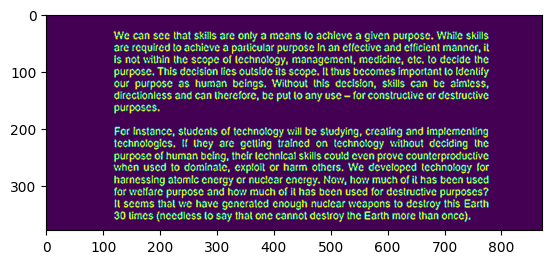

In [10]:
# apply image thresholding
img_thresh = cv2.adaptiveThreshold(img,    
          255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# invert the image, 255 is the maximum value
img_thresh = 255 - img_thresh
# display image
plt.imshow(img_thresh)
plt.show()

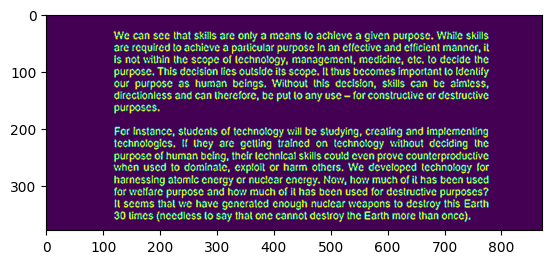

In [11]:
#align text properpy
def align_text(im):
  coords = np.column_stack(np.where(img_thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  h,w = img.shape
  center = (w // 2, h // 2)
  
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img_thresh, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
# align image text
img = align_text(img)
# display rotated and aligned image
plt.imshow(img)
plt.show()

In [12]:
# split text into rows
# find sum of column values, row-wise
a = np.sum(img == 255, axis=1)
rows = []
seg = []
for i in range(len(a)):
  if a[i] > 0:
    seg.append(i)
  if (a[i] == 0) & (len(seg) >= 5):
    rows.append(seg)
    seg = []
  if len(seg) > 0:
    rows.append(seg)
# number of row segments
len(rows)

297

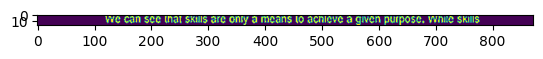

In [13]:
plt.imshow(img[rows[0][0]:rows[0][-1],:])
plt.show()

In [18]:
# text recognition
import cv2
import pytesseract
# read image
im = cv2.imread('i1.png')
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
text

['We can see that skills are only a means to achieve a given purpose. While skills',
 'are required to achieve a particular purpose in an effective and efficient manner, it',
 'is not within the scope of technology, management, medicine, etc. to decide the',
 'purpose. This decision lies outside its scope. It thus becomes important to identify',
 'our purpose as human beings. Without this decision, skills can be aimless,',
 'directionless and can therefore, be put to any use — for constructive or destructive',
 'purposes.',
 '',
 'For instance, students of technology will be studying, creating and implementing',
 'technologies. If they are getting trained on technology without deciding the',
 'purpose of human being, their technical skills could even prove counterproductive',
 'when used to dominate, exploit or harm others. We developed technology for',
 'harnessing atomic energy or nuclear energy. Now, how much of it has been used',
 'for welfare purpose and how much of it has been us

In [21]:
type(text)

list

In [23]:
import cv2
import pytesseract
from gtts import gTTS
import os

# Read the image
im = cv2.imread('i1.png')

# Configurations for Tesseract
config = ('-l eng --oem 1 --psm 3')

# Use pytesseract to extract text from the image
text = pytesseract.image_to_string(im, config=config)

# Split the text into individual lines
text_lines = text.split('\n')

# Join text lines into a single string
text_to_read = ' '.join(text_lines)

# Print the extracted text
print(text_to_read)

# Convert text to speech
tts = gTTS(text_to_read, lang='en')

# Save the audio file
tts.save("output_audio.mp3")






# Play the audio file (optional)
os.system("start output_audio.mp3")


We can see that skills are only a means to achieve a given purpose. While skills are required to achieve a particular purpose in an effective and efficient manner, it is not within the scope of technology, management, medicine, etc. to decide the purpose. This decision lies outside its scope. It thus becomes important to identify our purpose as human beings. Without this decision, skills can be aimless, directionless and can therefore, be put to any use — for constructive or destructive purposes.  For instance, students of technology will be studying, creating and implementing technologies. If they are getting trained on technology without deciding the purpose of human being, their technical skills could even prove counterproductive when used to dominate, exploit or harm others. We developed technology for harnessing atomic energy or nuclear energy. Now, how much of it has been used for welfare purpose and how much of it has been used for destructive purposes? It seems that we have gen

0